File opened: <ifcopenshell.file.file object at 0x000002058E49DCD0>
CPU count: 8
File reopened: <ifcopenshell.file.file object at 0x00000205917591D0>


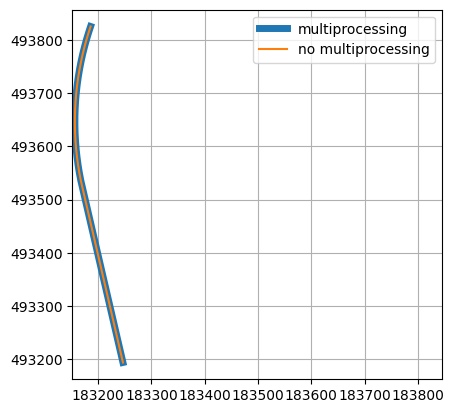

In [4]:
import ifcopenshell
import ifcopenshell.geom
import ifcopenshell.util.shape
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

# Initialize the plot
fig1 = plt.figure().add_subplot()

# Open the IFC file and set up geometry settings
f = ifcopenshell.open(r'F:\IfcAlignmentDriver\TestFiles\Br01_UTS.ifc')
print('File opened:', f)
e = f.by_id(133)
s = ifcopenshell.geom.settings()
s.set("dimensionality", ifcopenshell.ifcopenshell_wrapper.CURVES_SURFACES_AND_SOLIDS)

# Process with multiprocessing
cpu_count = multiprocessing.cpu_count()
print('CPU count:', cpu_count)
it = ifcopenshell.geom.iterator(s, f, cpu_count, include=[e])
if it.initialize():
    while True:
        shape = it.get()
        verts = ifcopenshell.util.shape.get_shape_vertices(shape, shape.geometry)
        e = shape.geometry.edges
        v = np.array(shape.geometry.verts).reshape((-1,3))
        x, y, z = v.T
        fig1.plot(x, y, label="multiprocessing",linewidth=5)
        if not it.next():
            break

# Process without multiprocessing
f = ifcopenshell.open(r'F:\IfcAlignmentDriver\TestFiles\Br01_UTS.ifc')
print('File reopened:', f)
e = f.by_id(133)
it = ifcopenshell.geom.iterator(s, f, include=[e])
if it.initialize():
    while True:
        shape = it.get()
        verts2 = ifcopenshell.util.shape.get_shape_vertices(shape, shape.geometry)
        v = np.array(shape.geometry.verts).reshape((-1,3))
        x, y, z = v.T
        fig1.plot(x, y, label="no multiprocessing")
        if not it.next():
            break

# Finalize the plot
fig1.legend(loc="upper right")
fig1.axis("square")
fig1.grid(True)
plt.show()  # Display the plot
